# **Metode Iterasi Satu Titik (Fixed Point Iteration)**
Diketahui
$
f(x) = x^3 + 6x^2 - 19x - 84
$. Dimulai dari $x_0 = 3$. Cari akar $x$ dengan menggunakan metode **iterasi satu titik** dengan cara memindahkan variabel $x$ ke sebelah kiri. [Lakukan iterasi hingga iterasi ke-5. Print semua iterasinya]

## **Langkah 1:** Cari akar sebenarnya

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return x**3 + 6*x**2 - 19*x - 84

koefisien = [1, 6, -19, -84]
akar = np.roots(koefisien)

print("Akar-akar sebenarnya:")
for r in akar:
    print(f"x ≈ {r.real:.2f}")

Akar-akar sebenarnya:
x ≈ 4.00
x ≈ -7.00
x ≈ -3.00


## **Langkah 2:** Gunakan metode iterasi satu titik dengan memindahkan variabel $x$ ke sebelah kiri



$
f(x) = x^3 + 6x^2 - 19x - 84
$

Sehingga didapatkan:

$
x_{i+1} = \frac{x_i^3 + 6x_i^2 - 84}{19}
$

In [ ]:
# Buat fungsi xi+1
def g(x):
    return round((round(x**3,2) + 6*round(x**2,2) - 84) / 19, 2)
x0 = 3

# Tampilkan tabel iterasi
print(f"{'i':<8}{'xi':<10}")
for i in range(1, 6):
    x1 = g(x0)
    x0 = x1
    print(f"{i:<8}{x1:<10}")

i       xi        
1       -0.16     
2       -4.41     
3       -2.79     
4       -3.11     
5       -2.95     


Bisa dilihat bahwa xi mendekati -3. Oleh karena itu, untuk perhitungan ET kita akan menggunakan -3 sebagai x sebenarnya.

## **Langkah 3:** Carilah nilai ET dan EA setiap iterasi


In [ ]:
x0 = 3

# (i, xi, ea, et)
iterasi = [(0, x0, None, round(abs(-3 - x0)* 100, 2))]

for i in range(1, 6):
    x1 = g(x0)
    ea = round(abs((x1 - x0) / x1) * 100,2)
    et = round(abs(-3 - x1) * 100,2)
    iterasi.append((i, x1, ea, et))
    x0 = x1

# Tampilkan tabel iterasi
print(f"{'i':<8}{'x_i':<10}{'EA (%)':<20}{'ET (%)'}")
for n, x, ea, et in iterasi:
    ea_str = f"{ea:.2f}" if ea is not None else "-"
    print(f"{n:<8}{x:<10.2f}{ea_str:<20}{et:.2f}")

i       x_i       EA (%)              ET (%)
0       3.00      -                   600.00
1       -0.16     1975.00             284.00
2       -4.41     96.37               141.00
3       -2.79     58.06               21.00
4       -3.11     10.29               11.00
5       -2.95     5.42                5.00


## **Tambahan:** Visualisasi Grafik


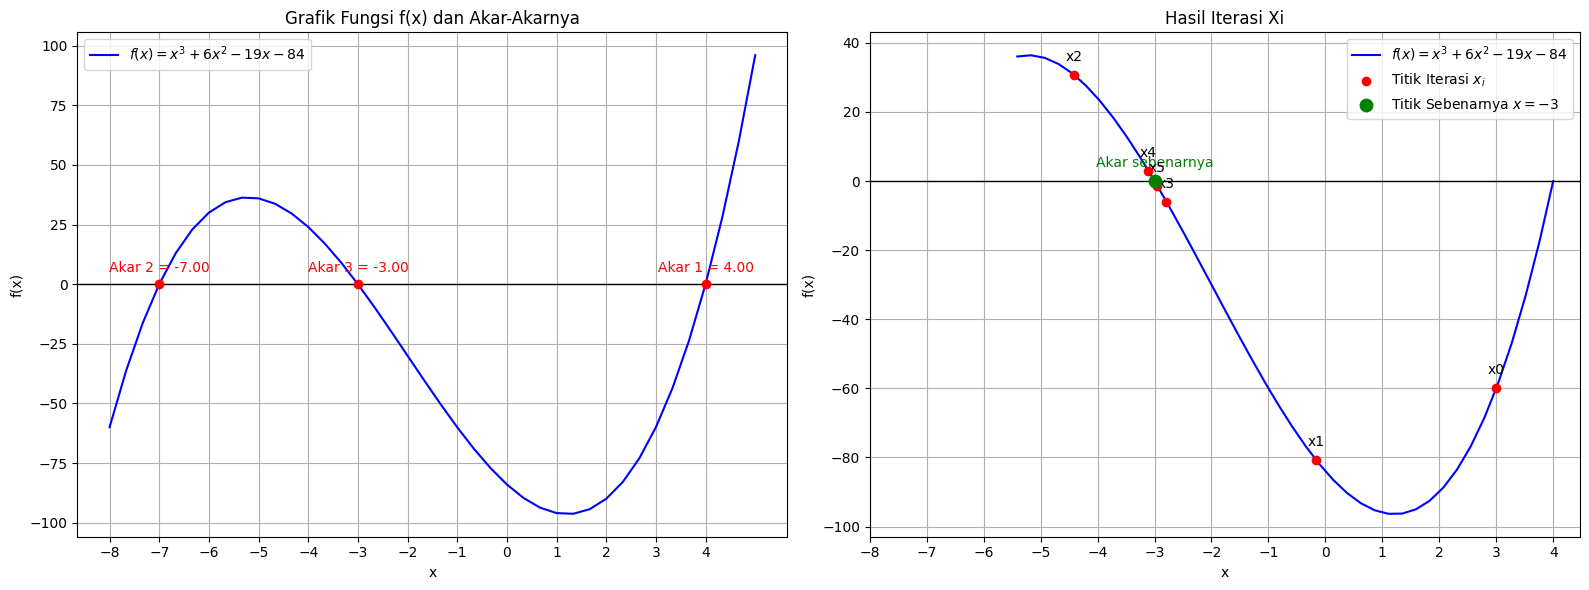

In [ ]:
# Ambil xi,yi dari setiap iterasi
xi_vals = [x for _, x, _, _ in iterasi]
fi_vals = [f(x) for x in xi_vals]


# Bagi layout jadi kiri kanan biar rapi
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

x1 = np.linspace(min(akar)-1, max(akar)+1, 40)
y1 = f(x1)

# --- Grafik 1: Visualisasi f(x) ---
ax[0].plot(x1, y1, label=r"$f(x) = x^3 + 6x^2 - 19x - 84$", color="blue")
ax[0].axhline(0, color='black', linestyle='-', linewidth=1)
for i, r in enumerate(akar):
    ax[0].plot(r, 0, 'ro')
    ax[0].text(r, 5, f"Akar {i+1} = {r:.2f}", color="red", ha='center')

ax[0].set_title("Grafik Fungsi f(x) dan Akar-Akarnya")
ax[0].set_xlabel("x")
ax[0].set_ylabel("f(x)")
ax[0].set_xticks(np.arange(-8, 5,1))
ax[0].grid(True)
ax[0].legend()

# --- Grafik 2: Visualisasi Grafik per Iterasi ---
xi_vals = [x for _, x, _, _ in iterasi]
fi_vals = [f(x) for x in xi_vals]
x2 = np.linspace(min(xi_vals)-1, max(xi_vals)+1, 40)
y2 = f(x2)

ax[1].plot(x2, y2, label=r"$f(x) = x^3 + 6x^2 - 19x - 84$", color="blue")
ax[1].axhline(0, color='black', linestyle='-', linewidth=1)
ax[1].scatter(xi_vals, fi_vals, color='red', zorder=5, label="Titik Iterasi $x_i$")

ax[1].scatter(-3, 0, color='green', s=80, zorder=6, label="Titik Sebenarnya $x = -3$")
ax[1].annotate("Akar sebenarnya", (-3, 0), textcoords="offset points", xytext=(0, 10), ha='center', color='green')

for i, (x, fx) in enumerate(zip(xi_vals, fi_vals)):
    ax[1].annotate(f"x{i}", (x, fx), textcoords="offset points", xytext=(0, 10), ha='center')


ax[1].set_title("Hasil Iterasi Xi")
ax[1].set_xlabel("x")
ax[1].set_ylabel("f(x)")
ax[1].set_xticks(np.arange(-8, 5,1))
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()